In [1]:
!pip install -r requirements.txt

In [2]:
import os
import sys
import cv2
import json
import time

# import open3d as o3d
import copy
import glob
import argparse
import tqdm
from natsort import natsorted
from scipy.spatial.transform import Rotation as R

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")
import zipfile

In [17]:

# if you upload the libraries file as zip run the below

# with zipfile.ZipFile('./custom_lib.zip', 'r') as zip_ref:
#     zip_ref.extractall()


In [6]:

# if you upload the data files as zip run the below
with zipfile.ZipFile('./2023-05-25.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:

from custom_lib.hyperspectral import HyperspectralImage
from custom_lib.utils import *

In [4]:
# set header to 16 bits
def update_line(l):
    if l.strip() == 'NBITS 12':
        return 'NBITS 16\n'
    return l


def update_hdr_file(path):
    with open(path, 'r') as f:
        lines = f.readlines()

    lines = [update_line(l) for l in lines]

    with open(path, 'w') as f:
        f.writelines(lines)

In [5]:
for path in tqdm.tqdm(glob.glob(os.path.join('./2023-05-25/', '**', '*.hdr'), recursive=True)):
    update_hdr_file(path)

100%|██████████| 17/17 [00:00<00:00, 896.38it/s]


In [6]:
def hypMask(file_name):
    img = cv2.imread(file_name)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(hsv, (38, 25, 25), (68, 255,255))
    
    ## slice the green
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    
    # Convert the 'green' image to grayscale to make it single channel
    th = cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)

    # Set the grayscale values to 255 where mask is >0
    th[th > 0] = 255
    
    kernel = np.ones((2,2),np.uint8)

    # Apply opening operation
    th = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
       
    return th

def hypMaskCI(file_name):
    img = cv2.imread(file_name)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(hsv, (38, 25, 25), (68, 255,255))
    
    ## slice the green
    imask = mask>0
    masked = np.zeros_like(img, np.uint8)
    masked[imask] = img[imask]
    
    # Convert the 'green' image to grayscale to make it single channel
    th = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)

    # Set the grayscale values to 255 where mask is >0
    th[th > 0] = 255
    
    
    kernel = np.ones((2,2),np.uint8)

    # Apply opening operation
    th = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernel)
    
    return th, img, masked

(385, 500, 3)


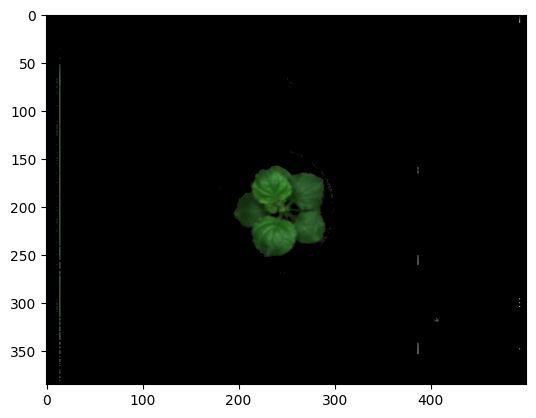

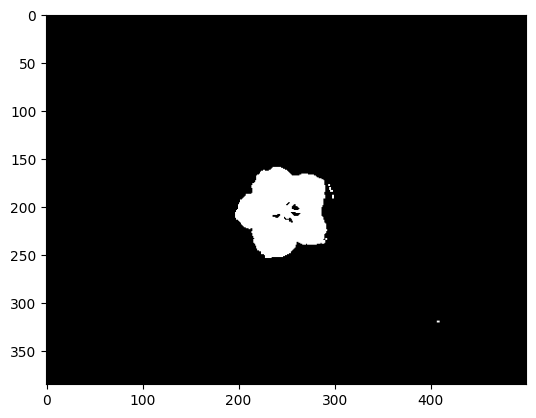

In [7]:
import cv2
import numpy as np

## Read
img = cv2.imread("./2023-05-25/2023-05-25_16-42-52.png")

## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,25,25) ~ (86, 255,255)
# mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
mask = cv2.inRange(hsv, (38, 25, 25), (68, 255,255))
# mask = cv2.inRange(hsv, (40, 107, 110), (86, 255,255))
## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

print(np.shape(green))

## save 
plt.imshow(cv2.cvtColor(green, cv2.COLOR_BGR2RGB))  # Use 'cmap' if your image is grayscale
plt.show()



# Convert the 'green' image to grayscale
green_1ch = cv2.cvtColor(green, cv2.COLOR_BGR2GRAY)

# Set the grayscale values to 0 where mask is 0
# green_1ch[mask == 0] = 0

# Set the grayscale values to 255 where mask is >0
green_1ch[green_1ch > 0] = 255

kernel = np.ones((2,2),np.uint8)

# Apply opening operation
green_1ch = cv2.morphologyEx(green_1ch, cv2.MORPH_OPEN, kernel)

# Display the resulting single-channel image
plt.imshow(green_1ch, cmap='gray')  # Use 'cmap' if your image is grayscale
plt.show()

In [49]:

col_names = ['tray_id', 'NDVI', 'NPCI', 'PSRI', 'NDRE', 'CCCI', 'PRI']

traits_dict = {key:[] for key in col_names}

['./2023-05-25/2023-05-25_16-42-52.png', './2023-05-25/2023-05-25_16-43-20.png', './2023-05-25/2023-05-25_16-43-48.png', './2023-05-25/2023-05-25_16-44-16.png', './2023-05-25/2023-05-25_16-44-45.png']
['./2023-05-25/2023-05-25--16-26-56_round-0_cam-1_calibFrame.hdr', './2023-05-25/2023-05-25--16-27-01_round-0_cam-1_calibFrame.hdr', './2023-05-25/2023-05-25--16-42-16_round-0_cam-1_calibFrame.hdr', './2023-05-25/2023-05-25--16-42-22_round-0_cam-1_calibFrame.hdr']
5
4
white: ./2023-05-25/2023-05-25--16-26-56_round-0_cam-1_calibFrame
dark: ./2023-05-25/2023-05-25--16-27-01_round-0_cam-1_calibFrame
img_path ./2023-05-25/2023-05-25--16-42-52_round-0_cam-1_tray-Tray_1


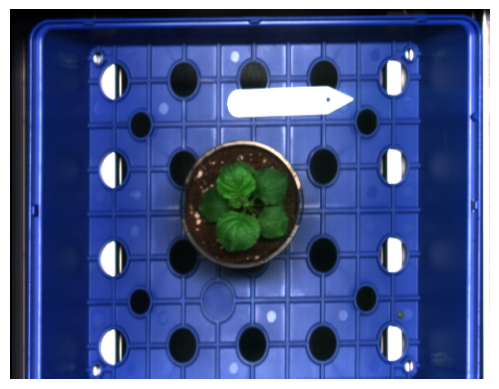

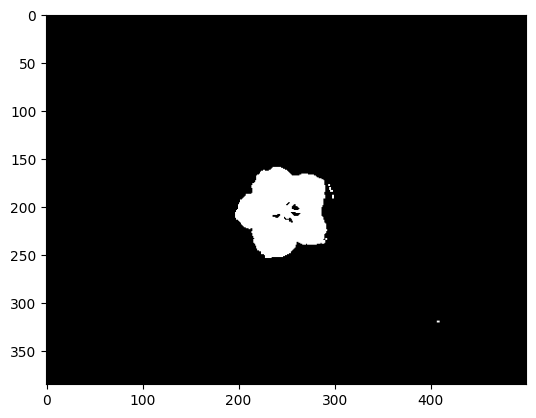

Error fixed


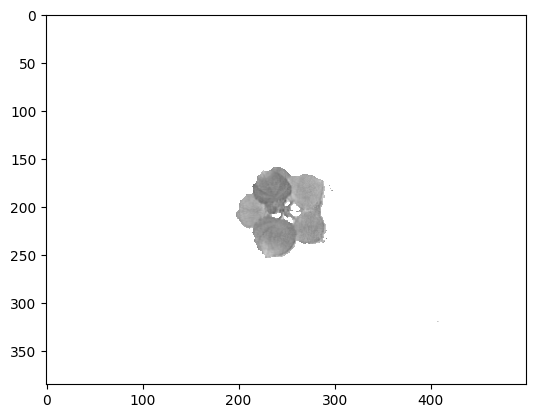

Average of all pixels in NDRE:  0.20301568335679848
Minimum value:  0.0
Maximum value:  0.4331038679600308
img_path ./2023-05-25/2023-05-25--16-43-20_round-0_cam-1_tray-Tray_2


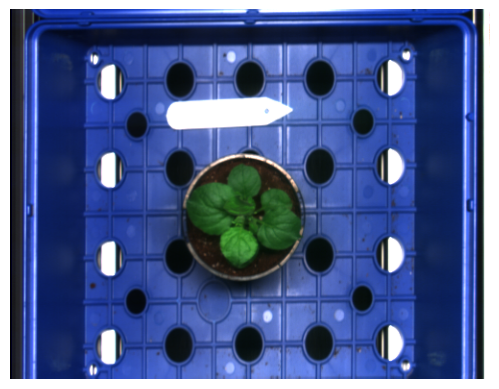

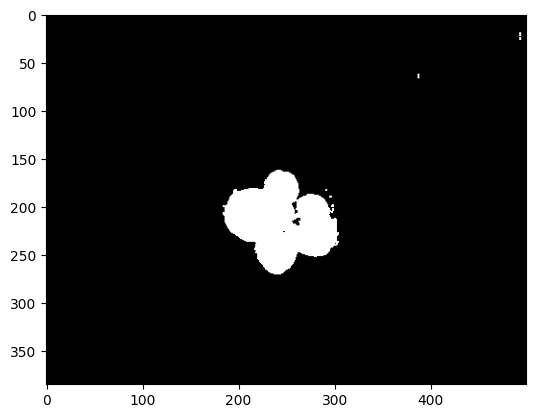

Error fixed


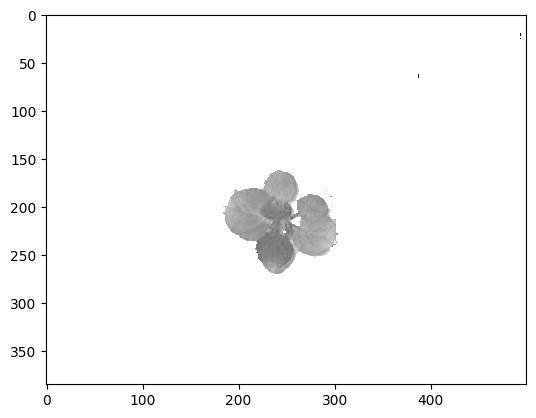

Average of all pixels in NDRE:  0.20912660966296726
Minimum value:  -0.1622255916212483
Maximum value:  0.4200241752573524
img_path ./2023-05-25/2023-05-25--16-43-48_round-0_cam-1_tray-Tray_3


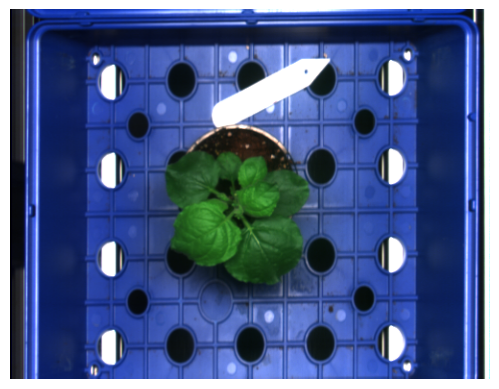

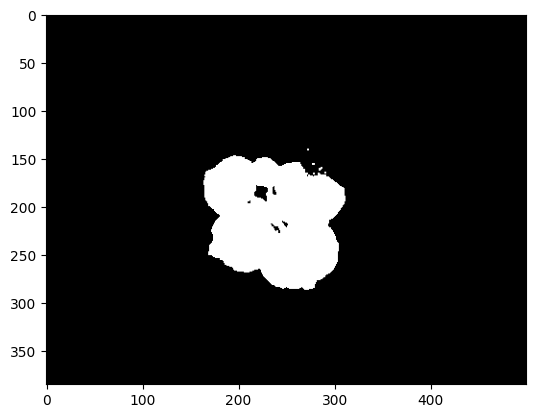

Error fixed


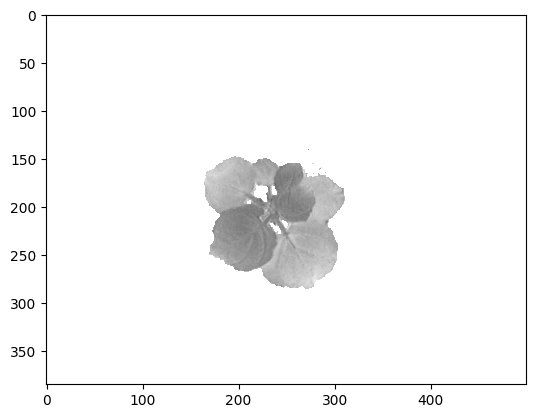

Average of all pixels in NDRE:  0.2267880399631008
Minimum value:  0.0
Maximum value:  0.4376537696555494
img_path ./2023-05-25/2023-05-25--16-44-16_round-0_cam-1_tray-Tray_4


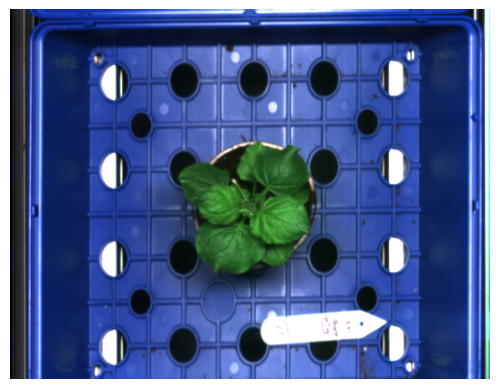

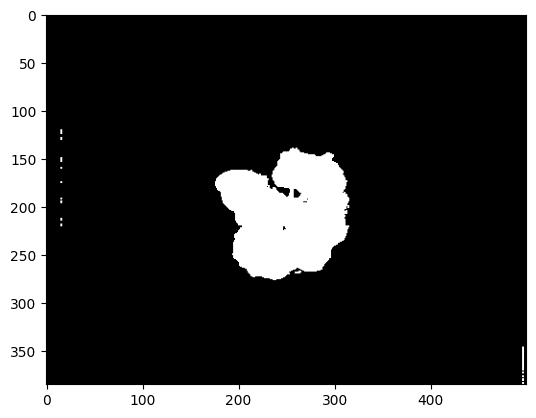

Error fixed


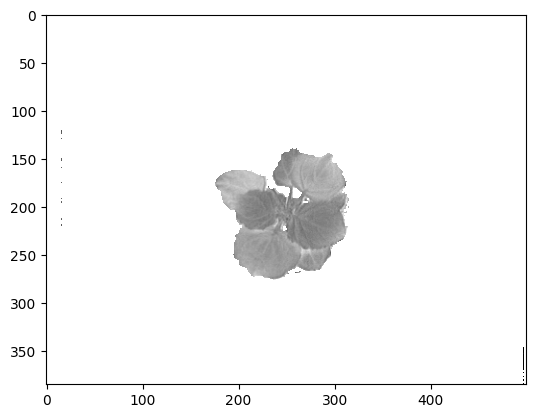

Average of all pixels in NDRE:  0.20517807254946893
Minimum value:  -0.25174303937683573
Maximum value:  0.5087461026588789
img_path ./2023-05-25/2023-05-25--16-44-45_round-0_cam-1_tray-Tray_5


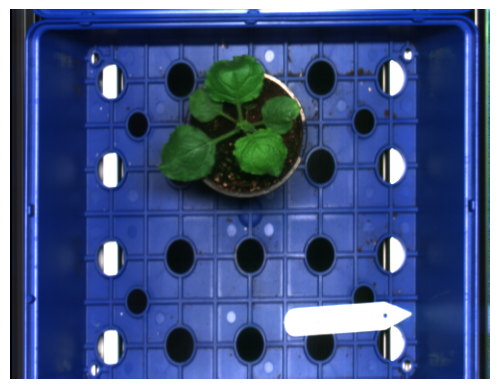

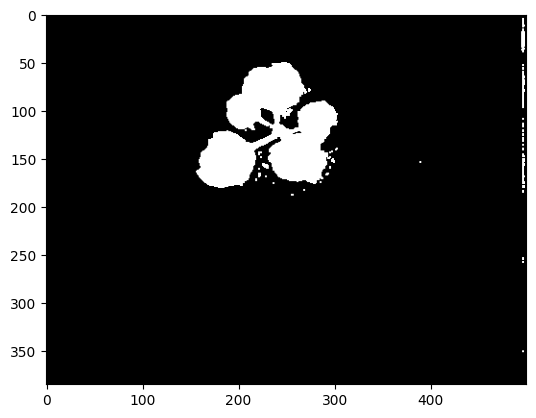

Error fixed


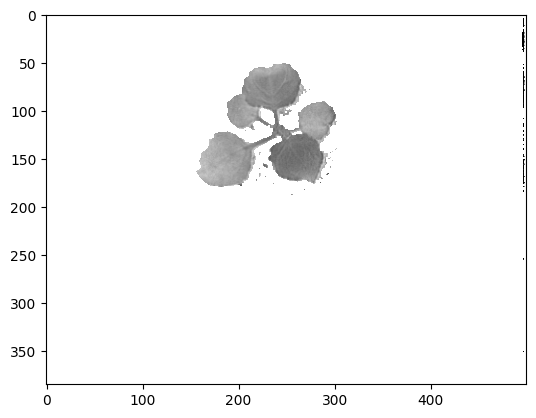

Average of all pixels in NDRE:  0.18329597573801124
Minimum value:  -0.35898208634543716
Maximum value:  0.4903572731022288
success


In [51]:
no_t = 5 # number of trays
root_path = "./2023-05-25/"

img_i = 0
cf_i = 0
const_HypImg = '_round-0_cam-1_tray-Tray_'
all_img_path = natsorted(glob.glob(os.path.join(root_path, '*.png'),recursive=False)) # make it true for multiple batches
print(all_img_path)
all_calib_file = natsorted(glob.glob(os.path.join(root_path, '*_round-0_cam-1_calibFrame.hdr'),recursive=False)) # make it true for multiple batches
print(all_calib_file)

l_imgs = len(all_img_path)
print(len(all_img_path))
print(len(all_calib_file))

for i in range(int(l_imgs/no_t)):
    if (img_i == l_imgs - 1):
        break
    # Extract base name without extension for white_calib and dark_calib 
    # Combine with root_path
    white_calib = os.path.join(root_path, os.path.splitext(os.path.basename(all_calib_file[i]))[0])
    dark_calib = os.path.join(root_path, os.path.splitext(os.path.basename(all_calib_file[i+1]))[0])
    
    print('white:', white_calib)
    print('dark:', dark_calib)
    
    for k in range(0,no_t):
        hyperspec_reference_path = all_img_path[img_i]
        tmp = os.path.splitext(os.path.basename(hyperspec_reference_path))[0].split('_')
        tmp = '--'.join(tmp)
        hyperspec_image_path = os.path.join(root_path, tmp+const_HypImg+str(k+1))
        print('img_path', hyperspec_image_path)
        image_hyperspec = HyperspectralImage(hyperspec_image_path, white_calib, dark_calib)
        calib_layers = image_hyperspec.extract_all_layers()

        hyper = calib_layers[1].astype(np.float64)
        wavelength = calib_layers[0]

        #           mask used for all traits
        th_ind = hypMask(hyperspec_reference_path)
        
        th_ind, img, masked = hypMaskCI(hyperspec_reference_path)
        
        # Display the resulting single-channel image
        # cv2.imshow("img_thresh", th_ind)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Now display the image in RGB format
        plt.imshow(img_rgb)
        plt.axis('off')  # Optional: Hide axes for a cleaner image display
        plt.show()
        
        plt.imshow(th_ind, cmap='gray')  # Use 'cmap' if your image is grayscale
        plt.show()


        # Checking for possible errors and fixing
        minWavelength = hyper[:, :, 0]
        masked_minWave = cv2.bitwise_and(minWavelength, minWavelength, mask = th_ind)
        avg_minWave = np.sum(masked_minWave)/np.count_nonzero(th_ind)

        maxWavelength = hyper[:, :, len(wavelength)-1]
        masked_maxWave = cv2.bitwise_and(maxWavelength, maxWavelength, mask = th_ind)
        avg_maxWave = np.sum(masked_maxWave)/np.count_nonzero(th_ind)

        if avg_minWave > avg_maxWave: # starting from 27 DAS
            hyper = 1 - hyper
            print("Error fixed")
            
        ind_name = "_NDRE"
        index, _ = get_ndre(hyper, wavelength)
        masked_ind = cv2.bitwise_and(index, index, mask = th_ind)
        # Display the resulting single-channel image
        # cv2.imshow("index_thresh", masked_ind)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        
        masked_array = np.ma.masked_where(~th_ind, masked_ind)
        plt.imshow(masked_array, cmap='gray', vmin = -0.1, vmax = 0.4)  # Use 'cmap' if your image is grayscale
        plt.show()
        
        print('Average of all pixels in NDRE: ',np.sum(masked_ind)/np.count_nonzero(th_ind))
        print('Minimum value: ', np.min(masked_ind))
        print('Maximum value: ',np.max(masked_ind))
        
        tmp_values = []
#             first add sid
        tmp_values.append(img_i)
        
#             NDVI
        index, _ = get_ndvi(hyper, wavelength)
        masked_ind = cv2.bitwise_and(index, index, mask = th_ind)
        # tmp_values.append(np.average(masked_ind)) # np.mean and np.average are same without parameters in average
        tmp_values.append(np.sum(masked_ind)/np.count_nonzero(th_ind)) # np.average(masked_ind[np.where(th_ind ==  255)])


#             NPCI
        index, _ = get_npci(hyper, wavelength)
        masked_ind = cv2.bitwise_and(index, index, mask = th_ind)
        tmp_values.append(np.sum(masked_ind)/np.count_nonzero(th_ind))

#             PSRI
        index, _ = get_psri(hyper, wavelength)
        masked_ind = cv2.bitwise_and(index, index, mask = th_ind)
        tmp_values.append(np.sum(masked_ind)/np.count_nonzero(th_ind))

#             NDRE
        index, _ = get_ndre(hyper, wavelength)
        masked_ind = cv2.bitwise_and(index, index, mask = th_ind)
        tmp_values.append(np.sum(masked_ind)/np.count_nonzero(th_ind))

#             CCCI
        index, _ = get_ccci(hyper, wavelength)
        masked_ind = cv2.bitwise_and(index, index, mask = th_ind)
        tmp_values.append(np.sum(masked_ind)/np.count_nonzero(th_ind))


#             PRI
        index, _ = get_pri(hyper, wavelength)
        masked_ind = cv2.bitwise_and(index, index, mask = th_ind)
        tmp_values.append(np.sum(masked_ind)/np.count_nonzero(th_ind))
        
        #    insert the values of the particular row one by one to dict
        for i in range(0,len(col_names)):
            traits_dict[col_names[i]].append(tmp_values[i])
        
            
        #             increase the image iterator
        img_i += 1
    
    #             increase the calibfile iterator
    cf_i += 2
    print('success')
    


In [53]:
df_hypIndex = pd.DataFrame(traits_dict)
df_hypIndex.head()

,tray_id,NDVI,NPCI,PSRI,NDRE,CCCI,PRI
0,0,0.774303,0.033660,-0.137473,0.203016,0.349696,0.010171
1,1,0.782051,0.001189,-0.142574,0.209127,0.451933,0.014758
2,2,0.810036,-0.013160,-0.143271,0.226788,0.479624,0.018924
3,3,0.780574,-0.021982,-0.161473,0.205178,0.445994,0.011170
4,4,0.733585,0.035097,-0.174795,0.183296,0.430593,0.007608


In [55]:
df_hypIndex.to_csv('./HypIndices.csv',index=False)